# Citibike Project


This project aims to answer the question **How is citibike representing NYC demographics? (in 2017)**. 

#### Team Members 
- Seonghee Lee (sl994) 
- Nicholas Rahardja (nmr73)
- Chelsea Choi (cc2583)

#### Team Github
- https://github.com/shljessie/citibike-nyc

#### Team Raw Data Google Drive 
- https://drive.google.com/drive/folders/197_d1BwPHXmVuyKA6I7UEyEw4Nqo8dAk 

#### Team Final Data Google Drive 
- https://drive.google.com/drive/folders/1glgD5ly1ABej2GDXzc-iUMjpu4HkItwa?usp=sharing
<br/> 

_______________


## Contents of this Notebook

1. Introduction
2. Data Description 
3. Pre Registration Statement 
4. Data Analysis 
5. Evaluation of Significance 
6. Interpretation and Conclusion
7. Limitations 
8. Source Code
9. Acknowledgement 
10. Appendix 
<br/> 
_______________

## 1) Introduction

1. Context of Work
2. Research Question
3. Main Findings
4. Summary of Results


#### 1. Context of Work

Bike Sharing comes with many benefits such as providing free or affordable access to bicycles for short-distance trips. By doing so in an urban area, this reduces congestion, noise, and air pollution. 

However **whether or not these bike sharing systems are truly accessible for all is questionable.** Since the accessibility of these bike sharing systems depend heavily on where the stations are located, it is very likely that where you live becomes the deciding factor in whether or not you will be able to use these bikes. In addition to this, other factors such as the condition of roads and price of usage may be factors that prohibit people from actively using citibikes.

In coming up with our research question, we looked at many research papers on bike sharing system equity. 
For example, a [study done by Portland State University](https://trec.pdx.edu/research/project/884) suggests that significant portions of the population are underrepresented among bike share users, including people of color, along with lower-income, female, older adults and less-educated groups. An [article in 2017](https://usa.streetsblog.org/2017/07/05/whats-keeping-people-from-using-bike-share-new-study-breaks-it-down-by-race-and-income/) finds that this may be due to the fact that these low-income communities and people of color view traffic risk, high prices, and the potential for crime and harassment as the biggest barriers to bicycling and using bike-share in their neighborhoods. There has also been [data visualization research at MIT](https://aberke.github.io/income-race-bikes/) about how bikes are being distributed in NYC throughout the years in accordance to race&income.

In this project, we are looking closer into how these findings on bike sharing this applies to New York City. We have chosen to look at citibike. In this project, **we look into how citibike stations are distributed in NYC** and how that relates to the following factors: 1) race&income and  2) citibike usage. Are there more stations in areas of higher usage regardless of race and income? Does race and income seem to have an unignorable correlation with how citibike stations are being distributed? How much of these factors play into the distribution of citibike? How might citibike station distribution be improved? These are the questions we will ask and attempt to answer throughout this project.
 
Through gaining insight on how citibike stations are distributed in NYC, we will attempt to gain insight into what NYC can do to improve the distribution of citibike to reflect the race/income and usage demographics. 

#### 2. Research Question

How is citibike representing NYC demographics? (in 2017).

Here **NYC demographics** will refer to Race and Income of NYC and the usages of citibike trips.

On the other hand, **citibike representation** will refer to the the distribution of stations and distribution of usage.

#### 3. Project Design + Limitations 

We are specificially looking at **NYC citibike trip data in 2017 as a sample** of the representation of NYC bike stations around New York. We chose New York City's citibike system since New York City is an area where there are widely varying levels of income. 
We chose 2017 for two reasons,    1) NYC's race and income data was available for the years 2013 -2018 and 2) 2017 was a year when many new stations of citibike where added to represent its overall usage.
We decided that 2017 would be a fair representation of how citibike stations were distributed throughout NYC.

We chose geoid as our standard for breaking up NYC into different geographical areas, since a geoid is the unique indentifier for a census tract, and a census tract is the smallest geographic region which the US goverment collects race and income data on during its annual Census. A census tract is roughly equivealnt to a neighborhood, and they generally encompass a population between 2500 to 8000 people. 
<a href="https://popfactfinder.planning.nyc.gov/#11.77/40.7438/-73.99">This link </a> has more information on geoids and the visual size of them on a map.

#### 4. Main Findings
We found that as of 2017, Citibike has primarily placed bike stations in areas that are predominantly white and wealthy. In doing so, Citibike has neglected to account for the needs of predominantly asian and black neighborhoods in NYC.

#### 5. Summary of Results
- We found that census tracts with a high number of stations actually had a lower number of trips. 
- We found that white and high income areas had a high number of stations
- We found that white areas have a high number of stations to meet demand
- We found that asian and black neighborhoods do not have enough stations to meet their current demand.
<br/> 

_______________

In [66]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

## 2) Data Description 

For this project we used 3 different data sets. 
1. Citibike Trip Data
2. Citibike Station Data
3. NYC Race and Income Data

The data cleaning process of these data are <a href="https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning">linked here</a>

### Dataset 1: Citibike Trip Data

In [3]:
trips_df = pd.read_csv('../data/citibike_trip_final.csv')
print('Number of Rows: {}'.format(trips_df.shape[0]))
print('Number of Columns: {}'.format(trips_df.shape[1]))
trips_df.head()

Number of Rows: 14049057
Number of Columns: 9


,start_time,stop_time,start_station_name,end_station_name,birth_year,gender,start_station_geoid,end_station_geoid,trip_minutes
0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,1965.0,2,3.606102e+10,3.606101e+10,11
1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,1987.0,2,3.606100e+10,3.606101e+10,21
2,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,1973.0,1,3.606101e+10,3.606101e+10,9
3,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,1977.0,2,3.606101e+10,3.606100e+10,13
4,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,1989.0,1,3.604700e+10,3.604702e+10,4


##### 1. What are the observations (rows) and the attributes (columns)?
Each observation in this data set corresponds to a trip taken on Citibike in 2017. The following are the features that are recorded for each trip: 
- start_time: Datetime object for the start time and date of the trip
- stop_time: Datetime object for the end time and date of the trip
- start_station_name: Name of starting station of the trip, a string
- end_station_name: Name of ending station of the trip, a string
- birth_year: Year user was born, an integer
- gender: (Zero=unknown; 1=male; 2=female)
- trip_minutes: Duration of the trip in minutes, an integer
- start_station_geoid: Unique identifier for the census tract that the trip started in, an integer
- end_station_geoid: Unique identifier for the census tract that the trip ended in, an integer. 

##### 2. Why was this dataset created?

This dataset was created to help developers, engineers, statisticians, artists, academics and the local public to explore the usage of citi bike around New York City. Insights from these findings would help citibike officials find answers to questions like where citibike users ride, how far they go,and what stations are the most popular. It is an open dataset on the public bike sharing system of New York City. It is open to the public to help people find insights about this system.

##### 3. Who funded the creation of the dataset?

This citibike data was funded by citibike in New York. Lyft is the operator of the Citi Bike program in New York City and Jersey City. The raw dataset was collected from this source https://www.citibikenyc.com/system-data 

##### 4.What processes might have influenced what data was observed and recorded and what was not?

Trips that may have been taken by staff who are managing citibike throughout the city are not good representations of citibikes trips by users only. Bikes may have been relocated overnight so that the distribution of bikes around the city are evenly distributed. Also bikes that may have been broken may lead to a loss of data.  Also citibike usage trip data is not a complete representation of all bike rider data in New York. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We dropped columns that we would not be using in our analysis, and also removed rows that had NaN values in them. Furthermore, since the original trips dataset was very large we chose to only consider trips taken by users who are citibike subscribers, in order to reduce the size of the dataset. Deciding to only keep trip data for subscribers also makes sense since, more then 90% of the original trips were taken by subscribers, so removing trips taken by non-subscribers (tourists and onetime users) should not have resulted in any significant loss of data. We have also dropped trips that were over 3 hours. The reason for this is because we wanted to be looking at regular users of citibike. If you keep a bike out for longer than 30 minutes at a time, regardless of the type, it's $0.18 per minute. According to citibike website in 2017 (https://www.citibikenyc.com/pricing/single-ride). Therefore using a citibike for unreasonably long hours of time even if you are a subscriber would be unreasonable since you are being charged. For this analysis we decided to set 3 hours as the limit to a reasonable amount of time,  a person who regularly uses a citibike would ride.  The original table has spaces in its column names, so we decided to change these with underscores to make the more friendly for computation. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

In signing up for using citibike, these users are allowing for citibike to take data of their usage. 
Citibike releases information about the user’s ride and trip duration  including their start station, usertype(Subscriber, one time user), gender, and year of birth. Citibike plans on using this data to understand citi bike users and the overall trend of citi bike users in new york city. Though many citibike users might not have been aware of this, they could have assumed that the data was collected to understand the citibike users for business related reasons.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/drive/folders/11YUr4yiiFKCNlN2MnGPGpCeXyrq92A0Z?usp=sharing



### Dataset 2 : Citibike Stations Data

In [4]:
stations_df = pd.read_csv('../data/citibike_stations_final.csv')
print('Number of Rows: {}'.format(stations_df.shape[0]))
print('Number of Columns: {}'.format(stations_df.shape[1]))
stations_df.head()

Number of Rows: 839
Number of Columns: 10


,station_id,station_name,lat,lon,first_trip,last_trip,geoid,trips_starting_here_2017,trips_ending_here_2017,total_trips_2017
0,254.0,W 11 St & 6 Ave,40.735324,-73.998004,2013-06-01,2019-07-31,36061006300,141183,143935,285118
1,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,2013-06-01,2019-07-31,36061006300,141183,143935,285118
2,253.0,W 13 St & 5 Ave,40.735439,-73.994539,2013-06-01,2018-10-31,36061006300,141183,143935,285118
3,345.0,W 13 St & 6 Ave,40.736494,-73.997044,2013-06-01,2018-10-31,36061006300,141183,143935,285118
4,151.0,Cleveland Pl & Spring St,40.721816,-73.997203,2013-06-01,2019-07-31,36061004100,121704,118537,240241


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a unique Citi Bike station in NYC. The following are the features for each station that is collected in this dataset: 

- station_id: Unique identifier for a station, an integer
- station_name: Name of the station, a string 
- lat: Latitude of the station, a float
- lon: Longitude of the station, a float 
- first_trip: Date of the first trip ever taken from the station, DateTime object 
- last_trip: Date of the last trip taken from the station (at the time this data set was downloaded), DateTime object
- geoid: Unique identifier for the NYC census tract that the station is located in, an integer 
- trips_starting_here_2017: number of trips taken from this station in 2017, an integer 
- trips_ending_here_2017: number of trips ending at this station in 2017, an integer
- total_trips_2017: total number of trips taken to and from this station in 2017, an integer

##### 2. Why was this dataset created?

The base dataset for this table came from the same source as the Citbike trip data set described above. However, more processing was done to this data to obtain this station dataset by a team of MIT researchers who were trying to map out the locations of Citi Bike stations in NYC for their research purposes. 

##### 3. Who funded the creation of the dataset?

This table uses as its base table the Cibike trip data set that was funded by citibike in New York. However, the processing that was done to this raw citi bike data was done by MIT researchers, so it can be assumed that MIT indirectly funded the creation of this Citibike trip data set. MIT Media Lab research: https://github.com/aberke/income-race-bikes/tree/master/data/nyc-bike


##### 4.What processes might have influenced what data was observed and recorded and what was not?

A small number of stations are located on the boundary between two census tracts, in which case we decided to select the first census tract returned by the API. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

The original citibike station data, was already well formatted, but did not include the geoid which we needed to identify, which geographic location does the station belong to. To obtain this geoid for each station, we used an API to obtain the geoid corresponding to the census tract that the station is located in. Next since our project focuses on 2017, we removed all stations that had its first trip after 2017 since this means that these stations were made after 2017, and thus are not relevant to our analysis. Furthermore, the original dataset had the number of trips from each station calculated up to 2019, thus we removed this column and used the trip dataset to calculate the number of trips taken to and from each station in 2017. We also renamed a few columns to make their names more intuitive such as renaming ‘id’ to ‘station_id’ and ‘name’ to ‘station_name’. 
Currently this station dataset doesn't exclude stations that are located in parks. But when we use this data alongside the race/income data of NYC the geoids of the parks (so the stations that are located in parks)are naturally removed because the census data of race/income does not look at a census of a park. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Since this data set is derived from the citi bike trips dataset, citi bike users were made aware that citibike would be tracking their usage data, when users signed up for the application. 

The expected usage of this data is the same as for the Citi Bike trip data above. 


##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/file/d/1pATvzg-PTpPvs_8x5pKIs_jqlbKrWyat/view?usp=sharing


### Dataset 3 : NYC Race and Income Data in 2017

In [4]:
race_income_df = pd.read_csv('../data/race_and_income_final.csv')
print('Number of Rows: {}'.format(race_income_df.shape[0]))
print('Number of Columns: {}'.format(race_income_df.shape[1]))
race_income_df.head()

Number of Rows: 4787
Number of Columns: 8


,geoid,2017_median_income,2017_population,2017_white_population,2017_black_population,2017_asian_population,2017_other_population,2017_2_or_more_races
0,36001000100,27250,1939,502,1142,16,112,167
1,36001000200,24091,4731,710,3474,104,32,411
2,36001000300,33454,5558,2589,1539,559,291,580
3,36001000401,74255,2459,2183,131,92,28,25
4,36001000403,70815,4695,3256,714,416,79,230


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a different census tract in NYC. A census tract is the smallest geographical area, defined by the US goverment, which census data is collected on. For each census tract the following are the attributes in the dataset. 

- geoid: Unique identifier for the census tract that the station is located in, an integer 
- 2017_median_income: Median income (dollars) in the census tract in 2017, an integer
- 2017_population: Total population in the census tract in 2017, an integer
- 2017_white_population: Total number of White individuals in the census tract, an integer
- 2017_black_population: Total number of Black individuals in the census tract, an integer
- 2017_asian_population: Total number of Asian individuals in the census tract, an integer
- 2017_2_or_more_races : Total number of individuals who identify as two or more races in the census tract, an integer

##### 2. Why was this dataset created?

This dataset was created in order to study the census tract data along with the associated race and income in that tract from 2017. This was done by extracting the household median income and household race from the American Community Survey. 

##### 3. Who funded the creation of the dataset?

This data was created and funded by the United States Census bureau. ACS: https://data.census.gov/cedsci/The creation of this dataset was funded by the MIT Media Lab. MIT Media Lab : https://github.com/aberke/income-race-bikes/blob/master/data/ny/race_and_income_data.csv.

##### 4. What processes might have influenced what data was observed and recorded and what was not?

The American Community Survey’s data collection process is performed by randomly selecting 3.5 million addresses to reply to the survey in order to represent the entire population. Because this survey is limited to those with addresses, there may be households and individuals who are not recorded in the census. For example, the homeless population is difficult to track and therefore could influence the data as well. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?
Because the original data from the American Community Survey was downloaded as a shapefile, the data had to be extracted and transformed into a dataframe. After extracting the race, income, and renaming the columns, the data set was created. 

Next, we dropped rows where the median income was missing or had NaN values. Furthermore for census tracts that had median income values of '$250,000+' we changed the median income value to '250,000' so that they can be treated as a numeric value. Laslty, we only kept the race and income data for 2017 and dropped all the other columns which correspond to the other years. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
The individuals contacted were aware of the data collection. In the constitution, it states that a census must be taken every 10 years. People likely understand the main purpose of the census as determining where federal and state funding should be spent. Moreover, their data is protected from being shared and used by any other government agency. 

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
https://drive.google.com/file/d/1obfrrDul07XDXEvyK6kf-N66_2K5-g88/view?usp=sharing
<br> 

_________

## 3) Preregistration Statement 

#### Research Question: How is citibike representing NYC demographics?

#### Analysis 1: What is the relationship between Citibike trips and number of stations in a census tract?

We first want to check if citibike is distributing its stations in areas of high demand regardless of the race/income distribution of NYC. Are there more stations in areas of higher usage regardless of race and income? 

- Compute the trips and number of stations in each geoid and see how this differs across geoid. 
- Compute **Linear Regression** to see how strongly the number of stations correlate with the number of trips taken from the census tract. The predictor variable is the number of stations and the thing we want to predict is the number of trips starting from that census tract. 

       
#### Analysis 2: How is station placement by geoid representing NYC race & income demographics? (Stations vs Race/Income) 

To further our understanding of whether citibike is fairly distributing its stations, we will look into whether the race and income of a census tract has a relationship with the number of stations located in the area.

- Look into the anomalies from analysis 1 (areas with high demand and low station and vice versa). 
- Look into which race and income level is the most well represented by citibike stations and which ones are the least well represented. 
- Look into which race and income level has the highest amount of citibike trips and which ones use citibikes the least. Compare this with the distribution of stations between the same categories. 
- Use **multivariable regression** to see how strongly race and income plays a role in determining the number of stations in a given census tract. Does the coefficients of the model align with what we expected? 


##### Additional Analysis

- 



## 4) Data Analysis 

#### Analysis 1: What is the relationship between Citibike trips and number of stations in a census tract?

##### Trips vs Number of Stations in a Census Tract

In order to understand wether Citibike fairly distributes its stations in NYC, we first want to look into whether citibike stations are distributed purely based on demand. Here we start off by understanding the relationship between citibike trips and the number of stations in a census tract.

- Compute the trips and number of stations in each geoid and see how this differs across geoid. 
- Compute **Linear Regression** to see how strongly the number of stations correlate with the number of trips taken from the census tract. The predictor variable is the number of stations and the thing we want to predict is the number of trips starting from that census tract. 


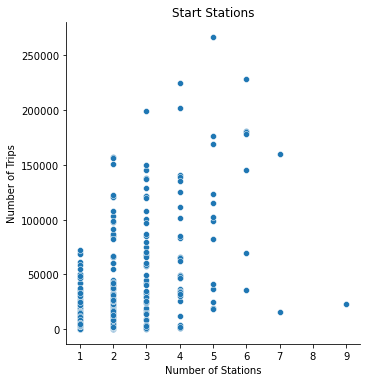

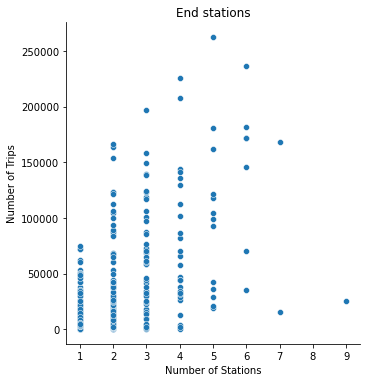

In [31]:
#group by geoid and count number of stations
stations_geoid = stations_df.groupby(['geoid']).size().reset_index(name = 'Number of Stations')
stations_geoid = stations_geoid.sort_values('Number of Stations', ascending=False)

#remove park geoids
geoids_remove=['36061014300','36047017700','36061000500','36081009900','36061031703','36047001800','36081003700']
stations_geoid = stations_geoid[~stations_geoid['geoid'].isin(geoids_remove)]

## Number of Start Stations at each geoid
trips_start_df = trips_df.groupby(['start_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_start_df = trips_start_df.sort_values('Number of Trips', ascending=False)
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')

## Number of End Stations at each geoid
trips_end_df = trips_df.groupby(['end_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_end_df = trips_end_df.sort_values('Number of Trips', ascending=False)
trips_end_df = trips_end_df.rename(columns={'end_station_geoid': 'geoid'})
trips_end_df= pd.merge(stations_geoid,trips_end_df,  on=['geoid'], how='inner')

## Start Stations
sns.relplot(x="Number of Stations", y="Number of Trips", data=trips_start_df)
plt.title("Start Stations")
plt.show()

## End stations 
sns.relplot(x="Number of Stations", y="Number of Trips", data=trips_end_df)
plt.title("End stations")
plt.show()

Looking at the scatterplot, **there seems to be no general relationship between the number of stations and the number of trips in a geoid**. For stations in the range 1-5, as the number of stations increases, there seems to be a wider range of number of trips that encompasses more trips. As the number of stations increases there is more variability in the number of trips in the data. However, as we look at the geoids with 6,7,9 stations we can see that this is not always the case. For geoids with 9 stations, there is a low usage. Other geoids with similar usage has 3 or even less number of stations. This goes the same for places with 5,6,7,8 stations. Though some places have a lot of usage, there seems to be a oversupply of stations in areas of less usage. 

This indicates that **perhaps too many stations are being placed at these locations (geoids with 9,7,6 stations) relative to their usage**. Now we will be conducting **Linear Regression** to evaluate that what we estimate is true from our scatterplot holds true nummerically.  This is suprising since we expected Citibike to distribute their stations more aligned with their usage. 

**additional things**

- check where stations 6,7,9 are located
- Also the start and end stations and trip relationship graphs look quite similar.why? 
- why do we have start station data and end station data?

### Linear Regression of Trips vs Stations

Now we will be conducting **Linear Regression** to evaluate that what we estimate is true from our scatterplot holds true nummerically. 

#### Hypothesis
We expect that places geoids with more trips will have more stations. 

##### H0: There is no relationship between the number of trips and the number of stations in a geoid
##### Ha: There is a relationship between the number of trips and the number of stations in a geoid

The significance level will be 0.05. We will conduct this for both the start station data and the end station data.
We will use the number of stations as the predictor and the number of trips as the response variable

- check if setting hypothesis this way is correct
- trips and stations setting is this okay?

In [62]:
trips_start_df.head()

,geoid,Number of Stations,Number of Trips
0,36047005300,9,23110
1,36061000700,7,159969
2,36081001900,7,15514
3,36061009900,6,228036
4,36061002100,6,145449


#### I. Start Station Data

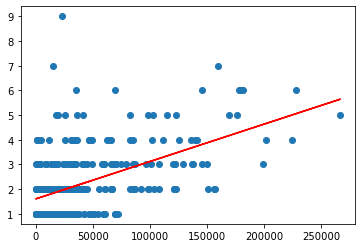

Coefficient of Linear Regression: 1.51e-05
Intercept of Linear Regression : 1.608
Pearson Correlation:  0.53
Spearman Correlation:  0.48
coefficient of determination (r2): 0.28


In [79]:
X = trips_start_df.iloc[:, 2].values.reshape(-1, 1) 
Y = trips_start_df.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
lr=linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

print("Coefficient of Linear Regression: {:.3g}".format(lr.coef_[0][0]))
print("Intercept of Linear Regression : {:.3f}".format(lr.intercept_[0]))

# pearson and spearman correlation calculation
pear_corr=trips_start_df['Number of Stations'].corr(trips_start_df['Number of Trips'])
sp_corr= trips_start_df['Number of Stations'].corr(trips_start_df['Number of Trips'],method='spearman')

print('Pearson Correlation: ',"{:.2f}".format(pear_corr))
print('Spearman Correlation: ',"{:.2f}".format(sp_corr))

residual = Y-Y_pred
mean_Y= np.mean(Y)

#find the sum of residual squared
rsq=residual *residual
ssr =sum(rsq)

#find sum of total sqaured
sst = sum((Y-mean_Y)**2)

#coefficient of determination
deter=ssr/sst
print("coefficient of determination (r2): {:.2f}".format(1-deter[0]))

For a linear regression with input start station, the slope is 18389.900. It tells us that when the number of stations increases by 1 in a geoid, the trips will change(increase) by 18389.900.
We can interpret 𝑟2 as the fraction of the variation in the output variable that can be explained (or predicted) by variation in the input variable(s). Therefore our r2 score of 0.28 means that approximately 28% (0.28) of the variation in Y can be explained(predicted) by X. In other words, the number of trips is explained well by the number of trips by approxmately 28% (0.28). 
Additionally we have also computed the correlation variables. Here the Correlation variables show that the 


#### II. End Station Data

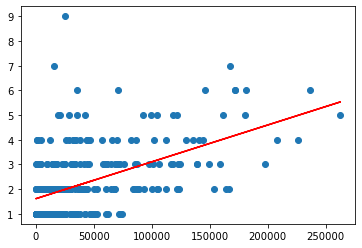

Coefficient of Linear Regression: 1.49e-05
Intercept of Linear Regression : 1.615
r2 Score : 0.276
Pearson Correlation:  0.53
Spearman Correlation:  0.48
coefficient of determination (r2): 0.28


In [81]:
X = trips_end_df.iloc[:, 2].values.reshape(-1, 1) 
Y = trips_end_df.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
lr=linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

r2=r2_score(Y, Y_pred)
print("Coefficient of Linear Regression: {:.3g}".format(lr.coef_[0][0]))
print("Intercept of Linear Regression : {:.3f}".format(lr.intercept_[0]))
print("r2 Score : {:.3f}".format(r2))

# pearson and spearman correlation calculation
pear_corr=trips_end_df['Number of Stations'].corr(trips_end_df['Number of Trips'])
sp_corr= trips_end_df['Number of Stations'].corr(trips_end_df['Number of Trips'],method='spearman')

print('Pearson Correlation: ',"{:.2f}".format(pear_corr))
print('Spearman Correlation: ',"{:.2f}".format(sp_corr))

residual = Y-Y_pred
mean_Y= np.mean(Y)

#find the sum of residual squared
rsq=residual *residual
ssr =sum(rsq)

#find sum of total sqaured
sst = sum((Y-mean_Y)**2)

#coefficient of determination
deter=ssr/sst
print("coefficient of determination (r2): {:.2f}".format(1-deter[0]))



Thus, since usage doesn't appear to be the only factor that influences where citibike stations are located, we next want to analyze the race and income distribution of the census tracts with seven, eight, and nine stations. This is to see whether they indicate any trends in their race and income distribution that can explain the reason why Citibike decided to place a large number of stations in these areas where there is little usage. 

#### Analysis 2: How is station placement by geoid representing NYC race & income demographics? (Stations vs Race/Income) 

To further our understanding of whether citibike is fairly distributing its stations, we will look into whether the race and income of a census tract has a relationship with the number of stations located in the area.

- Use **multivariable regression** to see how strongly race and income plays a role in determining the number of stations in a given census tract. Does the coefficients of the model align with what we expected? 


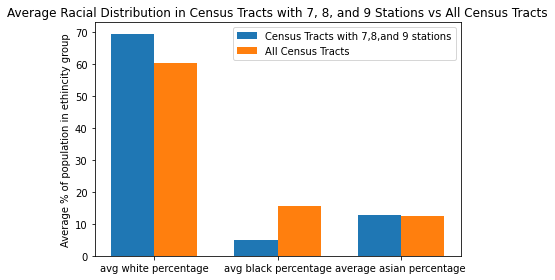

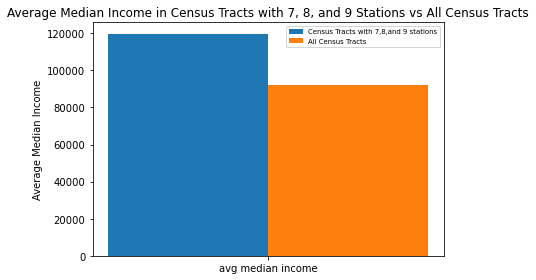

In [6]:
#obtaining the proportion of each racial category in the census tracts 
race_income_df['white_pct'] = 100*(race_income_df['2017_white_population'] / race_income_df['2017_population'])
race_income_df['black_pct'] = 100*(race_income_df['2017_black_population'] / race_income_df['2017_population'])
race_income_df['asian_pct'] = 100*(race_income_df['2017_asian_population'] / race_income_df['2017_population'])
#Selecting the race and income information for census tracts that have 7, 8, and 9 stations
selector = trip_station_geoid[trip_station_geoid['num_stations'].apply(lambda x: x in [7,8,9])]['geoid']
most_stations_ri = race_income_df[race_income_df['geoid'].apply(lambda x: x in list(selector))]
most_stations_race_means = np.array(most_stations_ri.mean(axis=0).loc[['white_pct','black_pct','asian_pct']])
most_stations_income_mean = np.array(most_stations_ri.mean(axis=0).loc['2017_median_income'])
#selecting race and income rows for all census tracts that have at least one station
race_income_w_stations_df = race_income_df[race_income_df['geoid'].apply(lambda x: x in list(stations_df['geoid'].unique()))]
stations_census_tracts_race_means = race_income_w_stations_df.mean(axis=0).loc[['white_pct','black_pct','asian_pct']]
stations_census_tracts_income_mean = race_income_w_stations_df.mean(axis=0).loc['2017_median_income']

def plot_bar(labels,data1,data2,ylabel,title,fontsize):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, data1, width, label='Census Tracts with 7,8,and 9 stations')
    rects2 = ax.bar(x + width/2, data2 , width, label='All Census Tracts')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(fontsize= fontsize)
    fig.tight_layout()
    plt.show()

#plotting the grouped bar chart for racial ethnicities
labels = ['avg white percentage', 'avg black percentage','average asian percentage']
plot_bar(labels,most_stations_race_means,stations_census_tracts_race_means,'Average % of population in ethincity group','Average Racial Distribution in Census Tracts with 7, 8, and 9 Stations vs All Census Tracts','medium')
#plotting the grouped bar chart for racial ethnicities
labels = ['avg median income']
plot_bar(labels,most_stations_income_mean,stations_census_tracts_income_mean,'Average Median Income','Average Median Income in Census Tracts with 7, 8, and 9 Stations vs All Census Tracts','x-small')

From these bar charts, we can see that the census tracts that had seven, eight, and nine stations have a much higher average median income, close to \\$120,000, compared to the average median income of \\$85,000 across all the other census tracts that had at least one station. Furthermore, we see that the census tracts that had an unexpectedly high number of stations compared to their number of trips are predominantly white neighborhoods. The average proportion of white individuals in these neighborhoods is close to 70%, which is high compared to the average white proportion across all the census tracts, 60%. Furthermore, these neighborhoods that appear to have too many stations also appear to have a very low number of black individuals. In these neighborhoods, black individuals only make up, on average, 5% of the population. These results seem to indiciate that some of Citibike's stations are placed not according to demand, but due to race and income factors. However, to see whether Citibike station placement is truly influenced by race and income rather than sorely based on demand, we next will look into the relationship between station placement, race, and income across all of the Citibike stations. 

### Main Statements

rq : how is citibike representing NYC demographics? 


a1 : trips vs stations

Trips cannot predict stations! Station placement is affected by sth else! 


a2: race/income vs stations

There is a relationship between race/income and stations! 


after a1, a2 we need to answer the question of where citibike should be distributed more. 


a3 :race/income vs trips



(evalsig)
- A1: permutation trips vs stations really no relationship!
- A2: (sth) to say there is a significant relationship btw race/income and stations
        - could be the lineargraph but should be more straight forward. 


(conclusion)
- interms of race/income not representing NYC demographics well (explain nummerically with graphs)
- in terms of trips not representing NYC demographics well(explain nummerically with graphs)
- seems to be stations located in parks. But the usage of those stations are not that high at all so there isn't a fair distribution (explain nummerically with graphs)

(proposal)
- in what geoids should there be more stations? 
    - single out places that have minority race/incoem and 
- other things citibike can do
    - shrink cost of usage
    - ~~~ safer roads